In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load California Housing dataset (version="small" equivalent)
housing = fetch_california_housing()

train_data = housing.data[:11610]
train_targets = housing.target[:11610]
test_data = housing.data[11610:]
test_targets = housing.target[11610:]


In [2]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

y_train = train_targets / 100000
y_test = test_targets / 100000

In [3]:
#building model

def get_model():
    # Because you need to instantiate the same model multiple times,
    # you use a function to construct it.
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="mean_squared_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [4]:
import keras
from keras import layers
import matplotlib.pyplot as plt

k = 4
num_val_samples = len(x_train) // k
num_epochs = 200  # Changed from 50 to match textbook
all_mae_histories = []  # Changed to save histories, not just scores

for i in range(k):
    print(f"Processing fold #{i + 1}")
    fold_x_val = x_train[i * num_val_samples : (i + 1) * num_val_samples]
    fold_y_val = y_train[i * num_val_samples : (i + 1) * num_val_samples]
    fold_x_train = np.concatenate(
        [x_train[: i * num_val_samples], x_train[(i + 1) * num_val_samples :]],
        axis=0,
    )
    fold_y_train = np.concatenate(
        [y_train[: i * num_val_samples], y_train[(i + 1) * num_val_samples :]],
        axis=0,
    )
    model = get_model()
    history = model.fit(  # Changed to save history
        fold_x_train,
        fold_y_train,
        validation_data=(fold_x_val, fold_y_val),  # Added validation_data
        epochs=num_epochs,
        batch_size=16,
        verbose=0,
    )
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)


Processing fold #1




Processing fold #2
Processing fold #3
Processing fold #4


In [5]:
#compute average mae
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

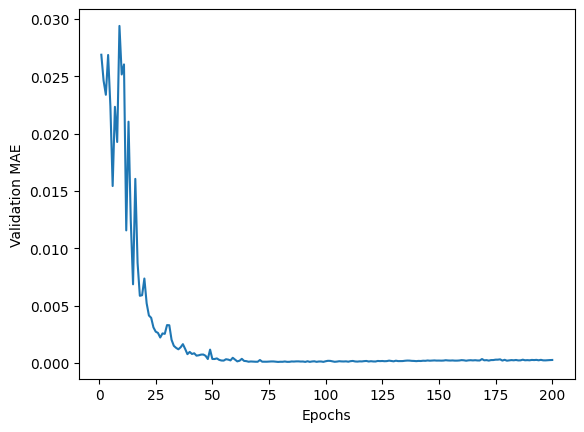

In [6]:
import matplotlib.pyplot as plt
epochs = range(1, len(average_mae_history) + 1)
plt.plot(epochs, average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

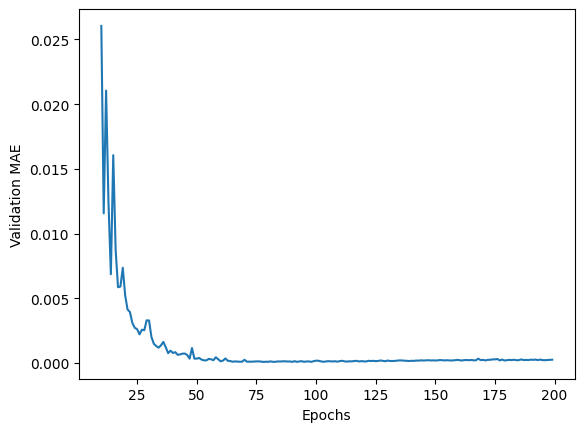

In [7]:
truncated_mae_history = average_mae_history[10:]
epochs = range(10, len(truncated_mae_history) + 10)
plt.plot(epochs, truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [8]:
model = get_model()
model.fit(x_train, y_train, epochs=130, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {test_mae}")

283/283 [==============================] - 0s 506us/step - loss: 4.7743e-08 - mean_absolute_error: 5.9383e-05
Test MAE: 5.938340837019496e-05
